In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import netCDF4 as nc
from ArcticTools import map


%matplotlib inline

In [2]:
nclist=[#'/ocean/xiaoxiny/research/result_jasper/data_exh005_bt/EXH005-bt_19912016.nc',
       # '/ocean/xiaoxiny/research/result_jasper/data_exh005_btscav/EXH005-btscav_19912016.nc',
        '/ocean/xiaoxiny/research/result_jasper/data_exh005_btscav_v2/EXH005-btscav_v2_19912016.nc',
        '/ocean/xiaoxiny/research/result_jasper/data_exh005_btscav_v2_cv/EXH005-btscav2_cv_19912015.nc',
        '/ocean/xiaoxiny/research/result_jasper/data_exh005_btscav_v2_cs/EXH005-btscav2_cs_19912016.nc'
       ]

In [3]:
shalow= nc.Dataset('/ocean/xiaoxiny/research/data/isobath_factor.nc').variables['shalow']
deep  = nc.Dataset('/ocean/xiaoxiny/research/data/isobath_factor.nc').variables['deep']

In [4]:
def load_depth(ptrc):
    data = ptrc.variables['deptht'][:]
    return data

In [5]:
dep = load_depth(ptrc=nc.Dataset(nclist[2]))
dep[30]

453.93774

In [6]:
def load_data(ptrc,deep_shawlow_file,layer = 30):
    data = ptrc.variables['TR_8'][:,layer,...]
    for i in range(data.shape[0]):
        data[i,...] = data[i,...]*deep_shawlow_file[:]
    return data

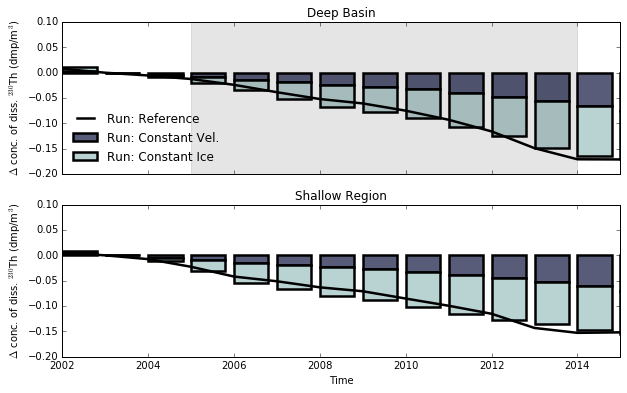

In [24]:
colors = cm.bone(np.linspace(0, 0.8, 3))

f,axes = plt.subplots(2,figsize = (10,6))

for ax,dsfile,title in zip (axes,[deep,shalow],['Deep Basin','Shallow Region']):
    for i,label in zip (range (len(nclist)),['Reference','Constant Vel.']):
        data = load_data(nc.Dataset(nclist[i]),dsfile)
        data[data==0]=np.ma.masked
        time = np.linspace(1991,1990+data.shape[0],data.shape[0])
        datam= data.max(axis=(1,2))
        if label == 'Reference':
            ax.plot(time,datam-datam[12],lw = 2.5, label ='Run: %s'%label,color=colors[i])
        else:
            ax.bar(time,datam-datam[12],lw = 2.5, label ='Run: %s'%label,color=colors[i])
            base = datam-datam[12]
        
    datascav2 = data.max(axis=(1,2))
    data = load_data(nc.Dataset(nclist[-1]),dsfile)[:-1]
    data[data==0]=np.ma.masked
    time = np.linspace(1991,1990+data.shape[0],data.shape[0])
    ts = data.max(axis=(1,2))
    intercept = ts[12]-datascav2[12]
    datam = data.max(axis=(1,2))-intercept
    ax.bar(time,datam-datam[12],bottom=base, lw = 2.5, label ='Run: Constant Ice',color=colors[-1])
   

    ax.set_xlim(2002,2015);ax.set_title(title);#ax.set_ylim(0.25,0.55)
plt.setp(axes[0].get_xticklabels(), visible=False)
axes[1].set_xlabel('Time');axes[0].legend(loc = 3,frameon=False);

[axy.set_ylabel('$\Delta$ conc. of diss. $^{230}$Th (dmp/m$^{3}$)') for axy in axes]
[axes[0].axvspan(year,year+9,color='k',alpha = 0.1) for year in [2005] ]
#plt.legend(loc=4,bbox_to_anchor=(0.95, -0.4),ncol=4) #prop={'weight':'bold'},